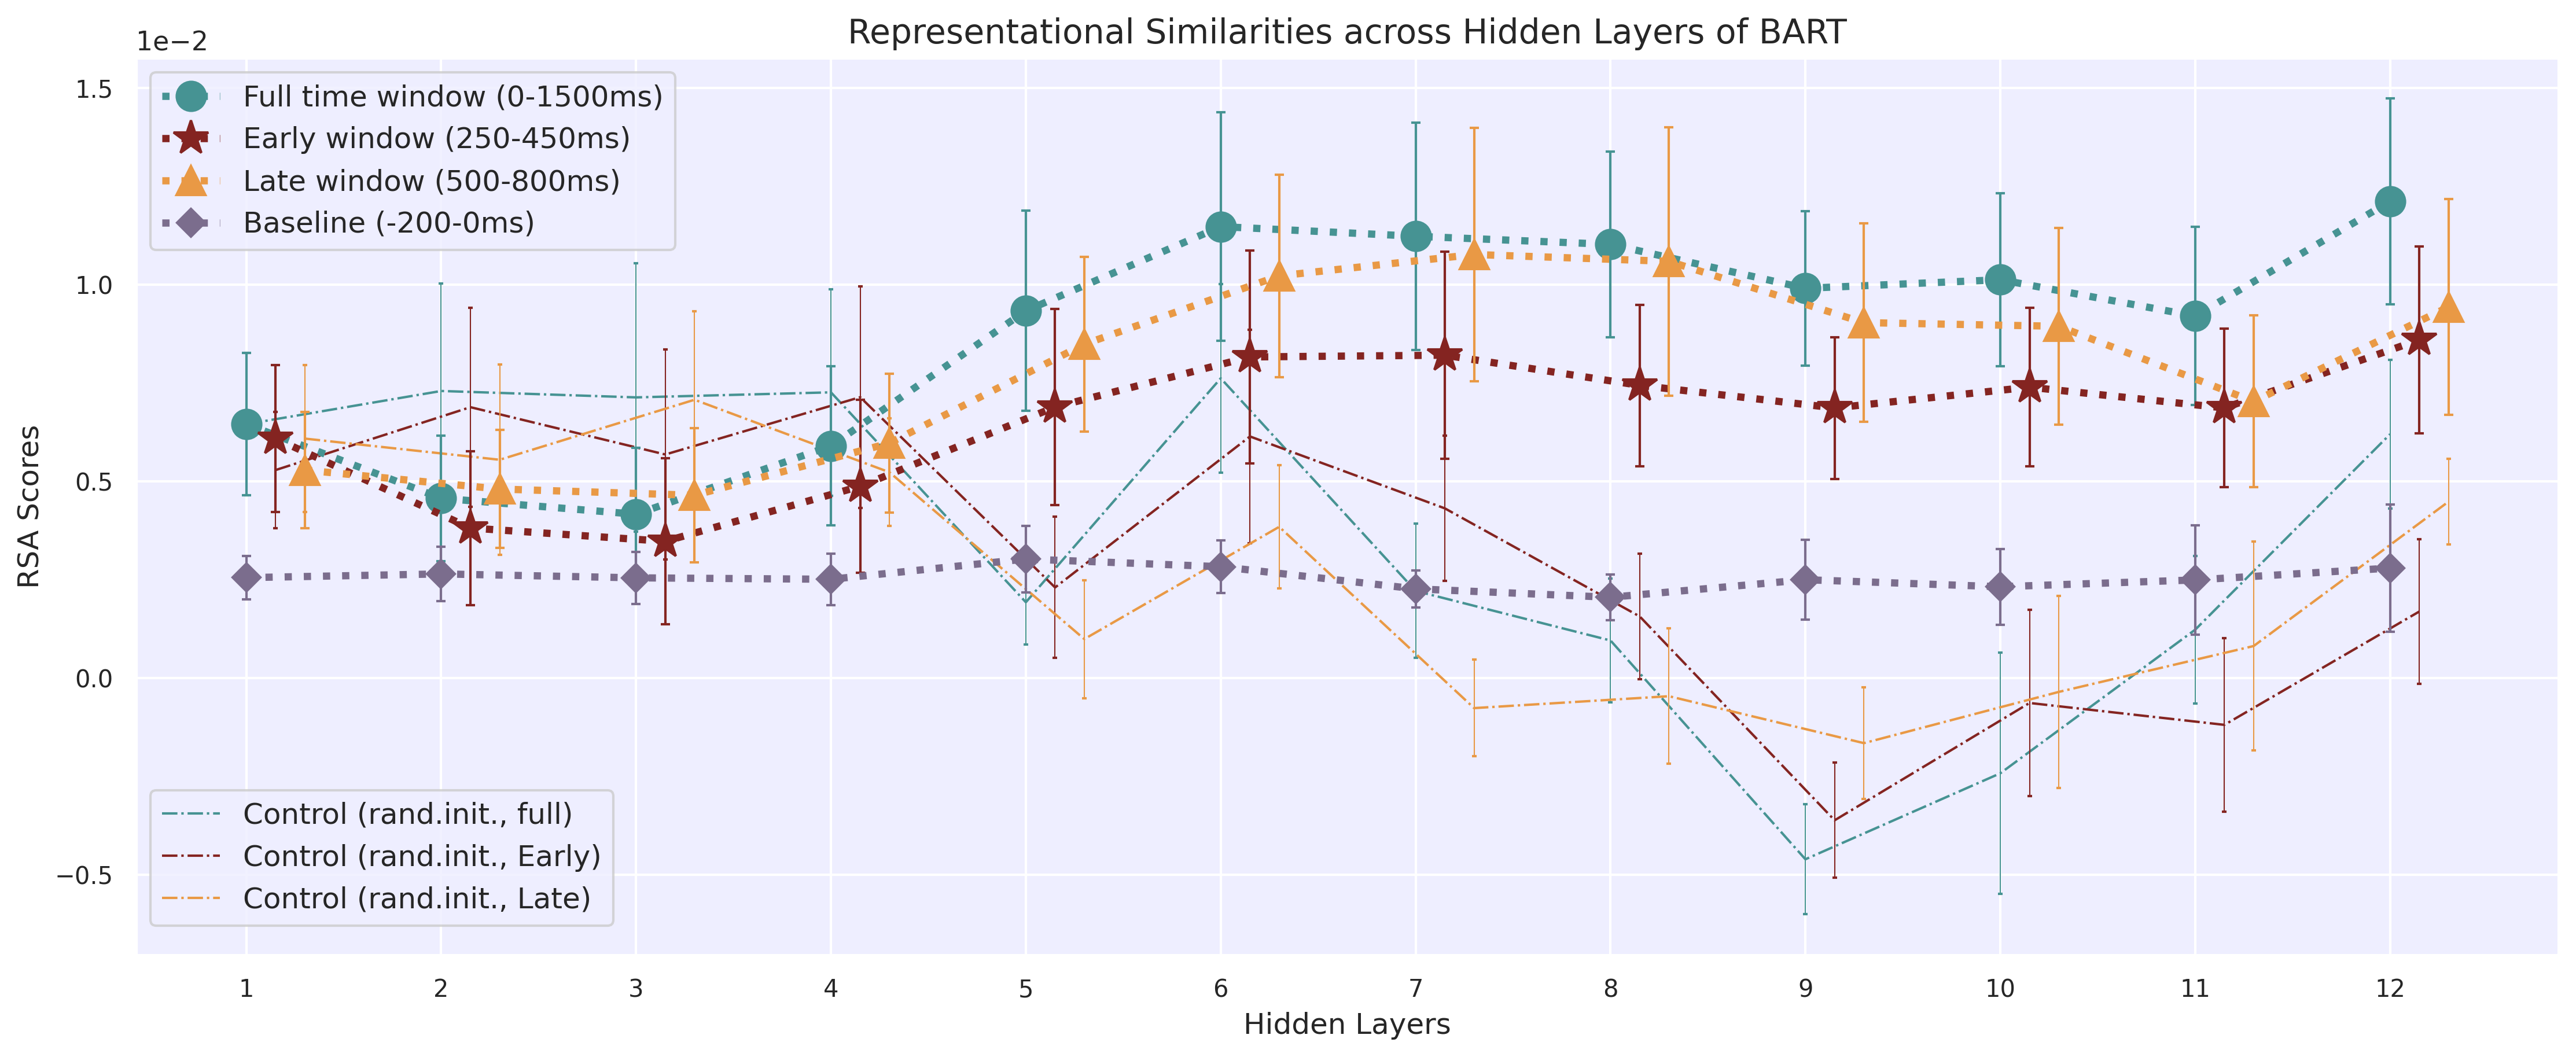

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# General function to read data files
def read_data(file_path):
    with open(file_path, "r") as file:
        data = eval(file.read())
    return np.array(data[:12])

# File paths (modified)
file_paths = [
    "spearman_corr/BART/BART_Full time window.txt",
    "spearman_corrBART/BART_Early window.txt",
    "spearman_corr/BART/BART_Late window.txt",
    "spearman_corr/BART/BART_Baseline.txt",
    "spearman_corr/BART/BART_Full time window_Random.txt",
    "spearman_corr/BART/BART_Early window_Random.txt",
    "spearman_corr/BART/BART_Late window_Random.txt"
]

# Read all data
spearman_corr_all = [read_data(file_path) for file_path in file_paths]

# Calculate mean and standard error of Spearman correlations for each hidden layer
hidden_layers = np.arange(1, 13)

def calculate_stats(data):
    mean_corr = np.mean(data, axis=1)
    se_corr = np.std(data, axis=1, ddof=1) / np.sqrt(data.shape[1])
    return mean_corr, se_corr

mean_se_pairs = [calculate_stats(data) for data in spearman_corr_all]
mean_spearman_corr = [pair[0] for pair in mean_se_pairs]
se_spearman_corr = [pair[1] for pair in mean_se_pairs]

# Set plot style using seaborn
sns.set_theme(style='darkgrid')
plt.rcParams['axes.facecolor'] = '#EEEEFF'

# Plot line graph
plt.figure(dpi=300, figsize=(15, 6.25))

# Updated data groups and their corresponding attributes
# data_labels = ['Condition1', 'Condition2', 'Condition3', 'Condition4', 'Condition1(rand)', 'Condition2(rand)', 'Condition3(rand)']
# data_labels = ['Condition1', 'Condition2', 'Condition3', 'Condition4', 'Control(C1)', 'Control(C2)', 'Control(C3)']
# colors = ['#469393', '#842421', '#E99945', '#1F2041', '#469393', '#842421', '#E99945']
data_labels = ['Full time window (0-1500ms)', 
               'Early window (250-450ms)', 
               'Late window (500-800ms)', 
               'Baseline (-200-0ms)', 
               'Control (rand.init., Full)', 
               'Control (rand.init., Early)', 
               'Control (rand.init., Late)']
colors = ['#469393', '#842421', '#E99945', '#7B6D8D', '#469393', '#842421', '#E99945']
markers = ['o', '*', '^', 'D', 'o', '*', '^']
linestyles = [':', ':', ':', ':', '-.', '-.', '-.']
markersizes = [12, 15, 12, 8, 0, 0, 0]
# markersizes = [7, 9, 7, 6, 0, 0, 0]
# linewidths = [1, 1, 1, 1, 1, 1, 1]
linewidths = [3, 3, 3, 3, 1, 1, 1]

# Define x-axis offsets
x_offsets = [0, 0.15, 0.3, 0, 0, 0.15, 0.3]

# 为误差线定义不同的样式
errorbar_styles = [
    {'capsize': 2, 'elinewidth': 1},  # 前4条的样式
    {'capsize': 2, 'elinewidth': 1},
    {'capsize': 2, 'elinewidth': 1},
    {'capsize': 2, 'elinewidth': 1},
    {'capsize': 1.0, 'elinewidth': 0.5},  # 后3条的样式
    {'capsize': 1.0, 'elinewidth': 0.5},
    {'capsize': 1.0, 'elinewidth': 0.5}
]

# 先画对照组 (index 4-6)
for i in range(4, 7):
    plt.plot(hidden_layers + x_offsets[i], mean_spearman_corr[i], marker=markers[i], label=data_labels[i],
             color=colors[i], linestyle=linestyles[i], markersize=markersizes[i], linewidth=linewidths[i])
    plt.errorbar(hidden_layers + x_offsets[i], mean_spearman_corr[i], yerr=se_spearman_corr[i], fmt='none',
                 color=colors[i], **errorbar_styles[i])

# 再画实验组 (index 0-3)
for i in range(4):
    plt.plot(hidden_layers + x_offsets[i], mean_spearman_corr[i], marker=markers[i], label=data_labels[i],
             color=colors[i], linestyle=linestyles[i], markersize=markersizes[i], linewidth=linewidths[i])
    plt.errorbar(hidden_layers + x_offsets[i], mean_spearman_corr[i], yerr=se_spearman_corr[i], fmt='none',
                 color=colors[i], **errorbar_styles[i])

# Set y-axis to scientific notation
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

plt.xlabel('Hidden Layers', fontsize=12)
plt.ylabel('RSA Scores', fontsize=12)
plt.title('Representational Similarities across Hidden Layers of BART', fontsize=14)
plt.xticks(hidden_layers, fontsize=10)
plt.yticks(fontsize=10)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 1, 2,    # 第一列的三项
         3, 4, 5, 6] # 第二列的四项
handles = [handles[idx] for idx in order]
labels = [labels[idx] for idx in order]

# 创建两列不等长的 legend
first_col = plt.legend(handles[:3], labels[:3], 
                      loc='upper left', 
                      bbox_to_anchor=(0.0, 0.2),
                      fontsize=12)
plt.gca().add_artist(first_col)

second_col = plt.legend(handles[3:], labels[3:], 
                       loc='upper left', 
                       bbox_to_anchor=(0.0, 1.0),
                       fontsize=12)

plt.tight_layout()
plt.show()